- Eliminar contexto y dejar contexto
- Eliminar contexto para análisis cuantitatívo de las palabras (densidad, conteo, etc)
- Dejar contexto para estraer información de las palabaras (gramaticalmente, significado, etc)

### Gramatica con el contexto

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.chunk.regexp import *

In [19]:
ejemplo ="I want a dress for a wedding"
tokens = word_tokenize(ejemplo)
print(tokens)

['I', 'want', 'a', 'dress', 'for', 'a', 'wedding']


In [20]:
tokens_min = [w.lower() for w in tokens]

In [21]:
# nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens_min)

[('i', 'NN'),
 ('want', 'VBP'),
 ('a', 'DT'),
 ('dress', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('wedding', 'NN')]

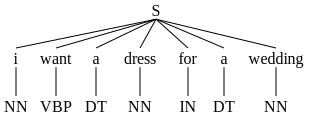

In [22]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
entities = nltk.chunk.ne_chunk(nltk.pos_tag(tokens_min))
entities

Palabras libres de contexto
- Creamos categorias para las palabras, las palabras pasan por cada una y se etiquetan en cada categoria. Las palabras pasan varias veces por las categorias pq pueden pertenecer a más de una. Una palabra puede ser un pronombre y un determinante, por ejemplo. Se llenan de abajo a arriba

In [23]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'i'
VP -> V NP | VP PP
Det -> 'a'
N -> 'dress' | 'wedding'
V -> 'want'
P -> 'for'
""")

In [24]:
parser = nltk.ChartParser(grammar)

def parsear(_tokens):
    return parser.parse(_tokens)

In [25]:
# Sale en una ventana nueva
for tree in parsear(tokens_min):
    tree.draw()

In [27]:
for tree in parsear(tokens_min):
    print(tree, '\n')
    tree.pretty_print()

(S
  (NP i)
  (VP
    (VP (V want) (NP (Det a) (N dress)))
    (PP (P for) (NP (Det a) (N wedding))))) 

     S                                    
  ___|_____________                        
 |                 VP                     
 |         ________|________               
 |        VP                PP            
 |    ____|___           ___|___           
 |   |        NP        |       NP        
 |   |     ___|____     |    ___|_____     
 NP  V   Det       N    P  Det        N   
 |   |    |        |    |   |         |    
 i  want  a      dress for  a      wedding

(S
  (NP i)
  (VP
    (V want)
    (NP (Det a) (N dress) (PP (P for) (NP (Det a) (N wedding)))))) 

     S                                
  ___|_________                        
 |             VP                     
 |    _________|____                   
 |   |              NP                
 |   |     _________|___               
 |   |    |    |        PP            
 |   |    |    |     ___|___           


Ejemplo con frase en Español

In [28]:
frase = "me gusta llegar puntual a clase"
tokens = word_tokenize(frase)
print(tokens)

['me', 'gusta', 'llegar', 'puntual', 'a', 'clase']


In [29]:
tokens_min = [w.lower() for w in tokens]
nltk.pos_tag(tokens_min)

[('me', 'PRP'),
 ('gusta', 'JJ'),
 ('llegar', 'JJ'),
 ('puntual', 'FW'),
 ('a', 'DT'),
 ('clase', 'NN')]

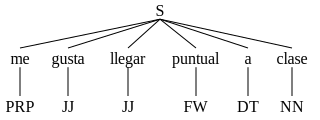

In [30]:
entidades = nltk.chunk.ne_chunk(nltk.pos_tag(tokens_min))
entidades

In [31]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Pronoun
VP -> V Infinitive Adverb PP
Infinitive -> 'llegar'
Adverb -> 'puntual'
PP -> P N
V -> 'gusta'
Pronoun -> 'me'
P -> 'a'
N -> 'clase'
""")

In [32]:
parser = nltk.ChartParser(grammar)

def parsear(_tokens):
    return parser.parse(_tokens)

for tree in parsear(tokens_min):
    tree.pretty_print()

                  S                           
    ______________|_________                   
   |                        VP                
   |       _________________|_________         
   NP     |       |         |         PP      
   |      |       |         |      ___|____    
Pronoun   V   Infinitive  Adverb  P        N  
   |      |       |         |     |        |   
   me   gusta   llegar   puntual  a      clase



OTRO EJEMPLO

In [38]:
frase3 = "La abuela bebe vodka y fuma porros"
tokens3 = word_tokenize(frase3)
tokens3_min = [w.lower() for w in tokens3]
print(tokens3_min)

['la', 'abuela', 'bebe', 'vodka', 'y', 'fuma', 'porros']


In [39]:
grammar3 = nltk.CFG.fromstring("""
S -> Otros Suj Accion Otros Accion
Suj -> Persona
Accion -> V N
Persona -> 'abuela'
V -> 'bebe' | 'fuma'
N -> 'vodka' | 'porros'
Otros -> 'y' | 'la'
""")

In [41]:
parser = nltk.ChartParser(grammar3)

for tree in parsear(tokens3_min):
    tree.pretty_print()

                            S                           
   _________________________|________________            
  |     Suj        Accion         |        Accion       
  |      |      _____|______      |     _____|______     
Otros Persona  V            N   Otros  V            N   
  |      |     |            |     |    |            |    
  la   abuela bebe        vodka   y   fuma        porros



In [62]:
frase4 = "La mujer compra un coche"
tokens4 = word_tokenize(frase4)
tokens4_min = [w.lower() for w in tokens4]
print(tokens4_min)

['la', 'mujer', 'compra', 'un', 'coche']


In [63]:
grammar4 = nltk.CFG.fromstring("""
S -> Otros Suj Accion Otros Accion | Otros Suj Accion
Suj -> Persona
Accion -> V N | V Otros N
Persona -> 'abuela' | 'mujer'
V -> 'bebe' | 'fuma' | 'compra'
N -> 'vodka' | 'porros' | 'coche'
Otros -> 'y' | 'la' | 'un'
""")

In [64]:
parser = nltk.ChartParser(grammar4)

for tree in parsear(tokens4_min):
    tree.pretty_print()

                S                
   _____________|______           
  |     Suj          Accion      
  |      |       ______|______    
Otros Persona   V    Otros    N  
  |      |      |      |      |   
  la   mujer  compra   un   coche



In [82]:
# "Pepe y María cocinan brownies"
frase5 = "Pepe y María cocinan brownies"
tokens5 = word_tokenize(frase5)
tokens5_min = [w.lower() for w in tokens5]
print(tokens5_min)

['pepe', 'y', 'maría', 'cocinan', 'brownies']


In [83]:
grammar5 = nltk.CFG.fromstring("""
S -> Otros Suj Accion Otros Accion | Otros Suj Accion | Suj Accion
Suj -> Persona | Persona Otros Persona
Accion -> V N | V Otros N
Persona -> 'abuela' | 'mujer' | 'pepe' | 'maría'
V -> 'bebe' | 'fuma' | 'compra' | 'cocinan'
N -> 'vodka' | 'porros' | 'coche' | 'brownies'
Otros -> 'y' | 'la' | 'un'
""")

In [84]:
parser = nltk.ChartParser(grammar5)

for tree in parsear(tokens5_min):
    tree.pretty_print()

                 S                           
           ______|______________              
         Suj                  Accion         
    ______|______         ______|_______      
Persona Otros Persona    V              N    
   |      |      |       |              |     
  pepe    y    maría  cocinan        brownies



In [85]:
frase6 = "María ha robado un huevo de avestruz del zoo"
tokens6 = word_tokenize(frase6)
tokens6_min = [w.lower() for w in tokens6]
print(tokens6_min)

['maría', 'ha', 'robado', 'un', 'huevo', 'de', 'avestruz', 'del', 'zoo']


In [94]:
grammar6 = nltk.CFG.fromstring("""
S -> Otros Suj Accion Otros Accion | Otros Suj Accion | Suj Accion | Suj Accion Objeto Lugar
Suj -> Persona | Persona Otros Persona
Accion -> V N | V Otros N | V V
Persona -> 'abuela' | 'mujer' | 'pepe' | 'maría'
Lugar -> Otros N
Objeto -> Otros N Otros N
V -> 'bebe' | 'fuma' | 'compra' | 'cocinan' | 'ha' | 'robado' | V V
N -> 'vodka' | 'porros' | 'coche' | 'brownies' | 'huevo' | 'avestruz' | 'zoo'
Otros -> 'y' | 'la' | 'un' | 'de' | 'del'
""")

In [95]:
parser = nltk.ChartParser(grammar6)

for tree in parsear(tokens6_min):
    tree.pretty_print()

                                  S                                  
    ______________________________|___________________________        
  Suj       Accion              Objeto                      Lugar    
   |      ____|______        _____|_____________         _____|____   
Persona  V           V    Otros   N    Otros    N     Otros        N 
   |     |           |      |     |      |      |       |          |  
 maría   ha        robado   un  huevo    de  avestruz  del        zoo

